In [1]:
from __future__ import division, print_function
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max.columns', 100)

import pylab as plt

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
df = pd.read_csv('telekom_karmasasi.csv')

In [3]:
df.head()

,Eyalet,Hesap Uzunlugu,Alan Kodu,Uluslararasi plan,Ses mail plan,vmail mesaj sayisi,toplam dakika gun,toplam cagri gun,toplam sarj gun,toplam aksam dakika,toplam aksam cagri,toplam sarj aksam,toplam gece dakika,toplam gece cagri,toplam sarj gece,toplam uluslararasi aksam,toplam uluslararasi arama,toplam uluslararasi sarj,Musteri servis arama,Karmasa
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 20)

In [5]:
df['Karmasa'].value_counts()

False    2850
True      483
Name: Karmasa, dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of      Eyalet  Hesap Uzunlugu  Alan Kodu Uluslararasi plan Ses mail plan  \
0        KS             128        415                No           Yes   
1        OH             107        415                No           Yes   
2        NJ             137        415                No            No   
3        OH              84        408               Yes            No   
4        OK              75        415               Yes            No   
...     ...             ...        ...               ...           ...   
3328     AZ             192        415                No           Yes   
3329     WV              68        415                No            No   
3330     RI              28        510                No            No   
3331     CT             184        510               Yes            No   
3332     TN              74        415                No           Yes   

      vmail mesaj sayisi  toplam dakika  gun  toplam cagri  gun  \
0         

In [7]:
df['Karmasa'].value_counts()

False    2850
True      483
Name: Karmasa, dtype: int64

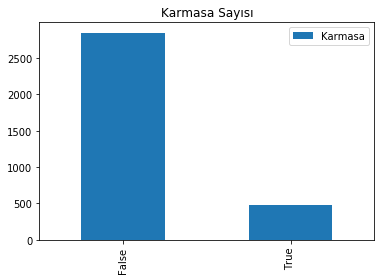

In [9]:
df['Karmasa'].value_counts().plot(kind='bar', label='Karmasa')
plt.legend()
plt.title('Karmasa Sayısı');

In [10]:
corr_matrix = df.drop(['Eyalet', 'Uluslararasi plan','Ses mail plan','Alan Kodu'], axis=1).corr()

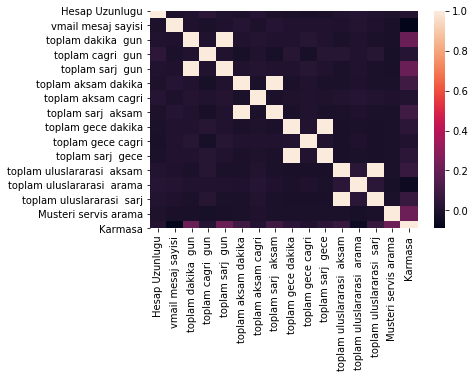

In [11]:
sns.heatmap(corr_matrix);

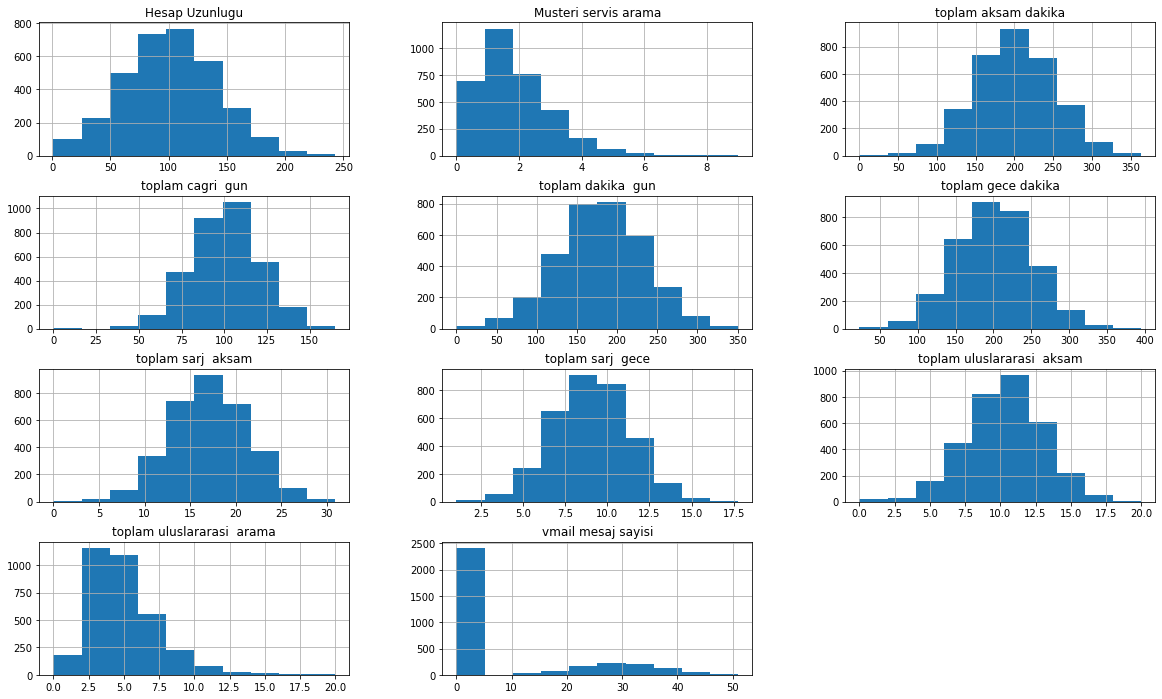

In [13]:
ozellikler = list(set(df.columns) - set(['Eyalet', 'Uluslararasi plan','Ses mail plan','Alan Kodu',
                                      'toplam sarj  gun',   'toplam aksam cagri',   'toplam gece cagri',
                                        'toplam uluslararasi  sarj', 'Karmasa']))

df[ozellikler].hist(figsize=(20,12));

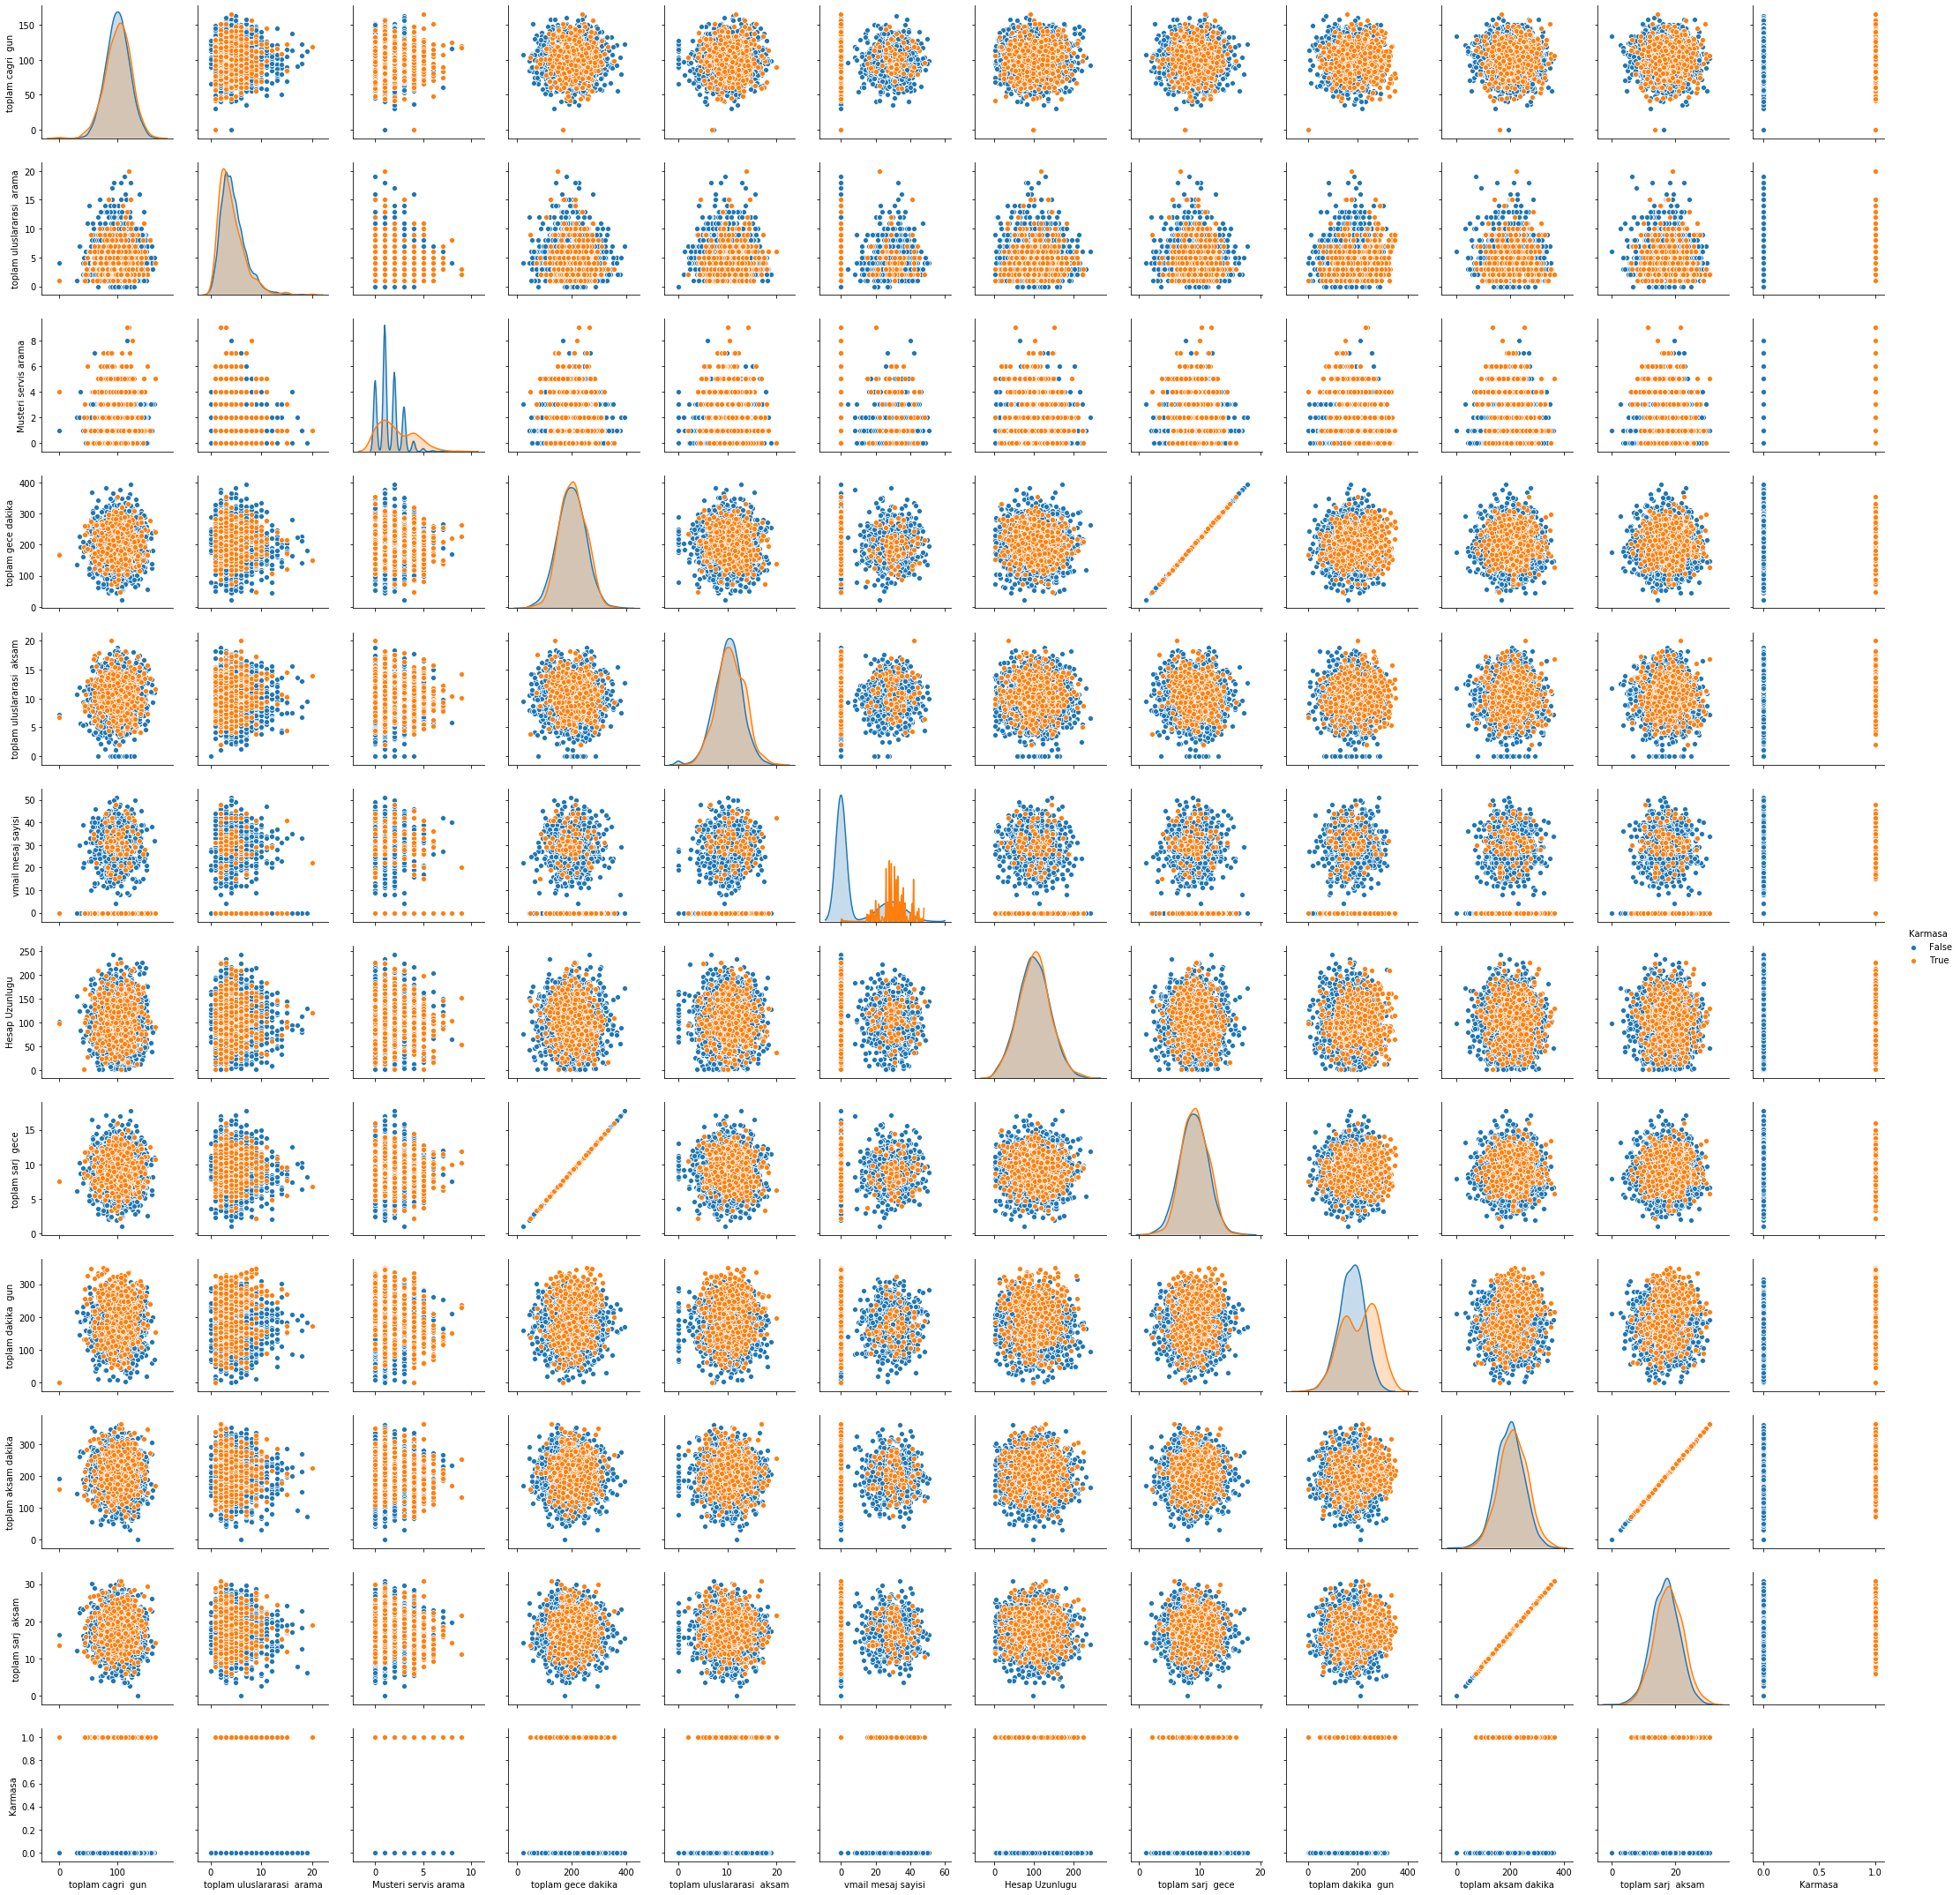

In [15]:
sns.pairplot(df[ozellikler + ['Karmasa']], hue='Karmasa');

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


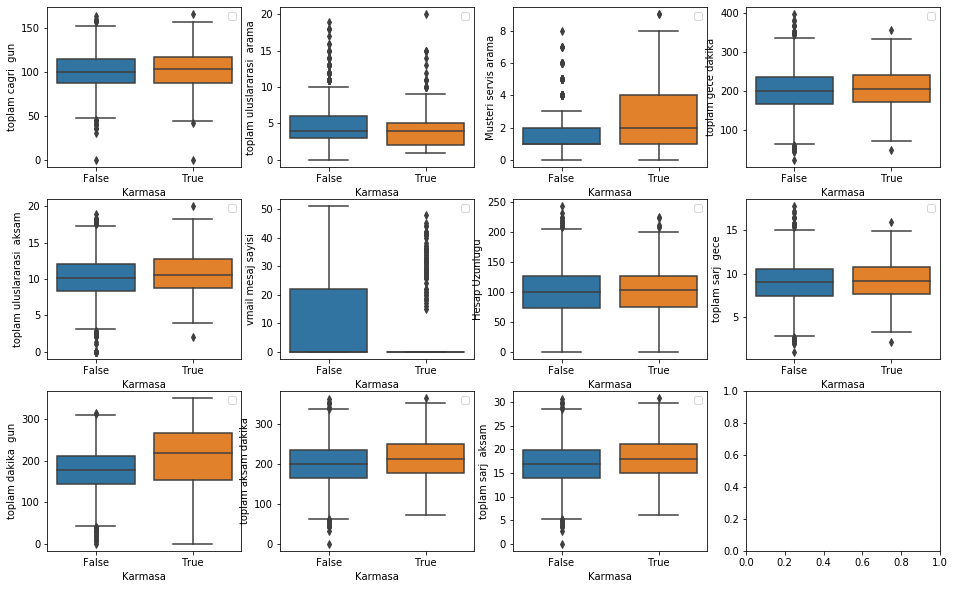

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(ozellikler):
    sns.boxplot(x='Karmasa', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('Karmasa')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

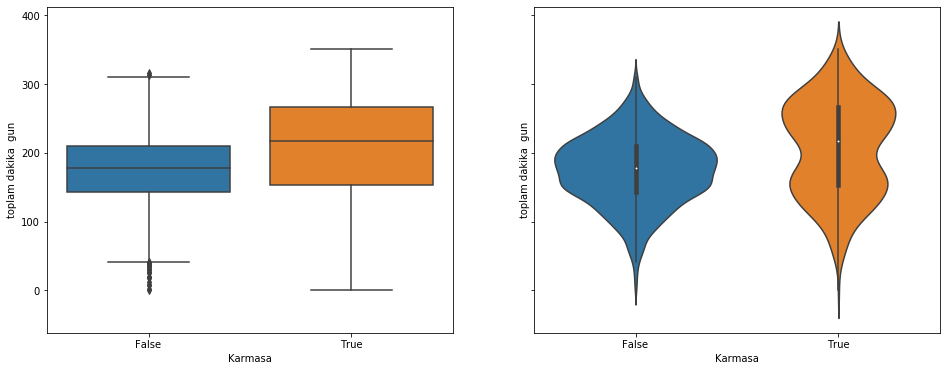

In [17]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.boxplot(x='Karmasa', y='toplam dakika  gun', data=df, ax=axes[0]);
sns.violinplot(x='Karmasa', y='toplam dakika  gun', data=df, ax=axes[1]);

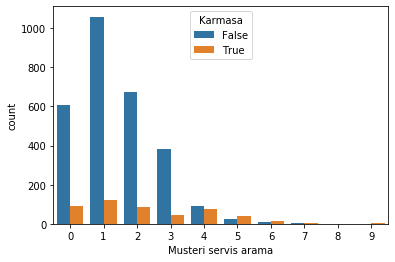

In [18]:
sns.countplot(x='Musteri servis arama', hue='Karmasa', data=df);

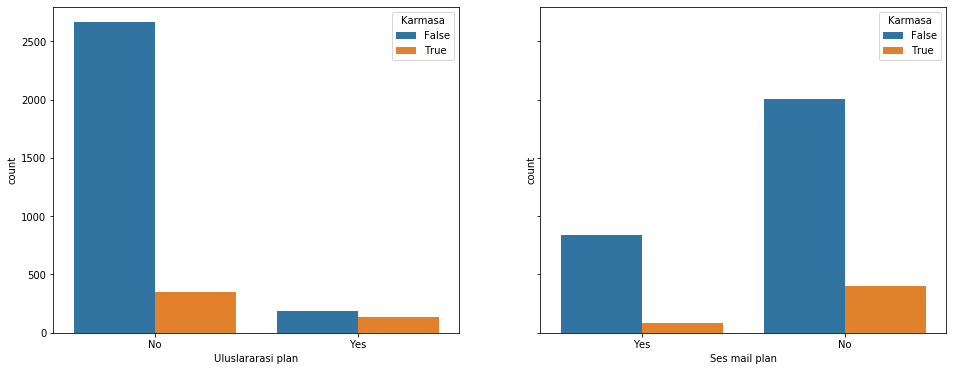

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='Uluslararasi plan', hue='Karmasa', data=df, ax=axes[0]);
sns.countplot(x='Ses mail plan', hue='Karmasa', data=df, ax=axes[1]);

In [22]:
pd.crosstab(df['Eyalet'], df['Karmasa']).T

Eyalet,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Karmasa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


In [24]:
df.groupby(['State'])['Karmasa'].agg([np.mean]).sort_values(by='mean', ascending=False).T

Eyalet,HI,AK,AZ,VA,IA,LA,NE,IL,WI,RI,DC,TN,WV,NM,ND,AL,VT,MO,WY,ID,IN,FL,OH,SD,KY,CO,UT,OR,OK,DE,GA,NH,NC,CT,MA,PA,MN,NY,KS,AR,MT,ME,WA,NV,MS,MI,SC,MD,TX,NJ,CA
mean,0.056604,0.057692,0.0625,0.064935,0.068182,0.078431,0.081967,0.086207,0.089744,0.092308,0.092593,0.09434,0.09434,0.096774,0.096774,0.1,0.109589,0.111111,0.116883,0.123288,0.126761,0.126984,0.128205,0.133333,0.135593,0.136364,0.138889,0.141026,0.147541,0.147541,0.148148,0.160714,0.161765,0.162162,0.169231,0.177778,0.178571,0.180723,0.185714,0.2,0.205882,0.209677,0.212121,0.212121,0.215385,0.219178,0.233333,0.242857,0.25,0.264706,0.264706


In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [26]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['Karmasa', 'Eyalet'], axis=1)
X['Uluslararasi plan'] = X['Uluslararasi plan'].map({'Yes': 1, 'No': 0})
X['Ses mail plan'] = X['Ses mail plan'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 34.8 s, sys: 484 ms, total: 35.2 s
Wall time: 35.1 s


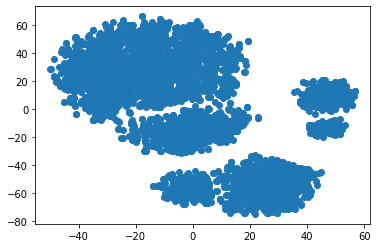

In [28]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

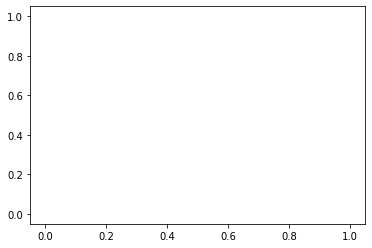

In [29]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Karmasa'].map({0: 'blue', 1: 'orange'}));

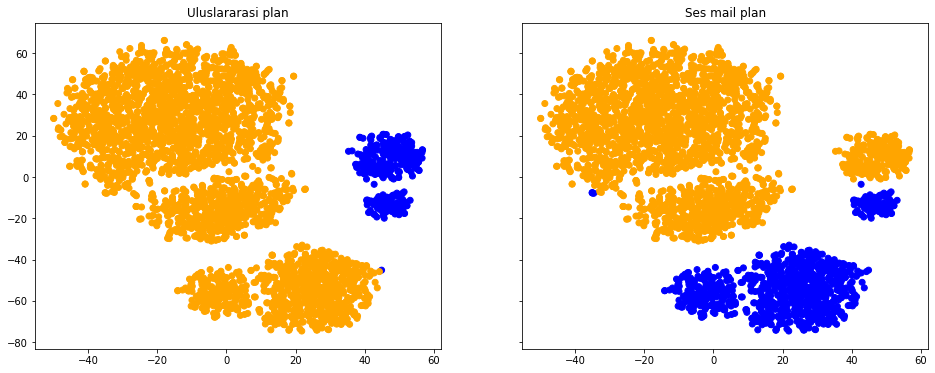

In [30]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Uluslararasi plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Ses mail plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[0].set_title('Uluslararasi plan');
axes[1].set_title('Ses mail plan');